Contenido bajo licencia Creative Commons BY 4.0 y código bajo licencia MIT. © Juan Gómez y Nicolás Guarín-Zapata 2020. Este material es parte del curso Modelación Computacional en el programa de Ingeniería Civil de la Universidad EAFIT.

# Lectura de mallas de Gmsh

## Introducción

Discutiremos algunos aspectos sobre la creación de mallas de Gmsh y
cómo importarlas.

**Al completar este notebook usted debería estar en la capacidad de:**

* Identificar la estructura jerárquica de los archivos `.geo` de Gmsh.

* Saber leer una malla de Gmsh usando `mehio`.

## Definición de la geometría en Gmsh

La geometría en Gmsh se crea usando objetos geométricos que
forman una jerarquía, de la siguiente manera:

- **Puntos:** definidos por sus coordenadas.

- **Segmentos de recta:** definidos por los puntos extremos.

- **Contornos (loops):** definidos por una unión de segmentos.

- **Superficies:** definidas por un contorno.

- **Volúmenes:** definidos por las superficies que forman la frontera.

Ilustremos esto con un ejemplo.

### Ejemplo: Anillo con agujero

En este ejemplo vamos a crear la geometrı́a y malla para una sección transversal de un cilindro con un
agujero coaxial. La geometrı́a constará de dos superficies, cada una con un arco de π radianes.

A continuación se muestra el esquema de la geometría y se resaltan los puntos
y líneas.

<center>
    <img src="img/anillo.svg"
         alt="Esquema de la geometría."
         style="width:600px">
</center>

Luego de tener esta información, podemos crear los contornos. Como se muestra a continuación.

<center>
    <img src="img/anillo_contornos.svg"
         alt="Esquema de la geometría con contornos."
         style="width:600px">
</center>


<div class="alert alert-warning">

Note que estos contornos están orientados en el sentido contrario a las manecillas del reloj,
es decir, con la mano derecha.

</div>

Si mallamos esta geometría en Gmsh, obtendríamos una malla como la que se muestra a continuación.


<center>
    <img src="img/anillo_msh.svg"
         alt="Malla de la geometría."
         style="width:500px">
</center>




### Archivo `.geo`

A continuación se presenta el archivo de `.geo` para esta geometría.

```c
// -- Definicion geometria --

// Parametros
rad_int = 2.0;  // Radio interior
rad_ext = 4.0;  // Redio exterior

// Puntos
Point(1) = {0.0, 0.0, 0, 1.0};
Point(2) = {-rad_ext, 0.0, 0, 1.0};
Point(3) = { rad_ext, 0.0, 0, 1.0};
Point(4) = {-rad_int, 0.0, 0, 1.0};
Point(5) = { rad_int, 0.0, 0, 1.0};

// Lineas
Circle(1) = {3, 1, 2};
Circle(2) = {2, 1, 3};
Circle(3) = {5, 1, 4};
Circle(4) = {4, 1, 5};
Line(5) = {2, 4};
Line(6) = {5, 3};

// Bucles y superficies
Line Loop(7) = {1, 5, -3, 6};
Plane Surface(8) = {7};
Line Loop(9) = {2, -6, -4, -5};
Plane Surface(10) = {9};

// Grupos fisicos
Physical Line(11) = {1, 2};
Physical Line(12) = {3, 4};
Physical Surface(13) = {8, 10};


// -- Parametros de malla --

// Subdivision de lineas
ndiv_arco = 44;  // Subdivisiones de los arcos
ndiv_rad = 12;    // Subdivisiones en la direccion radial
Transfinite Line {5, 6} = ndiv_rad Using Progression 1;
Transfinite Line {1, 3, 4, 2} = ndiv_arco Using Progression 1;

// Subdivision superficies
Transfinite Surface {8};
Transfinite Surface {10};
```

## Lectura del archivo de malla en Python

Para leer las mallas en Python podemos usar `meshio`.

Para su instalación necesitamos escribir lo siguiente

```bash
pip install meshio==3.0
```

en Anaconda Prompt.

In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import meshio

Para leer la malla usamos la funcion `read()` de Meshio,
cuyo parámetro de entrada es el archivo de entrada.

In [3]:
malla = meshio.read("files/anillo.msh")

Para acceder a los puntos y a los triángulo podemos usar lo siguiente.

In [4]:
puntos = malla.points
triangs = malla.cells["triangle"]

Para visualizar la malla podemos usar la función `triplot()`
que tiene como parámetros de entrada:
    
- Coordenadas $x$.

- Coordenadas $y$.

- Conectividad de los elementos.

<IPython.core.display.Javascript object>


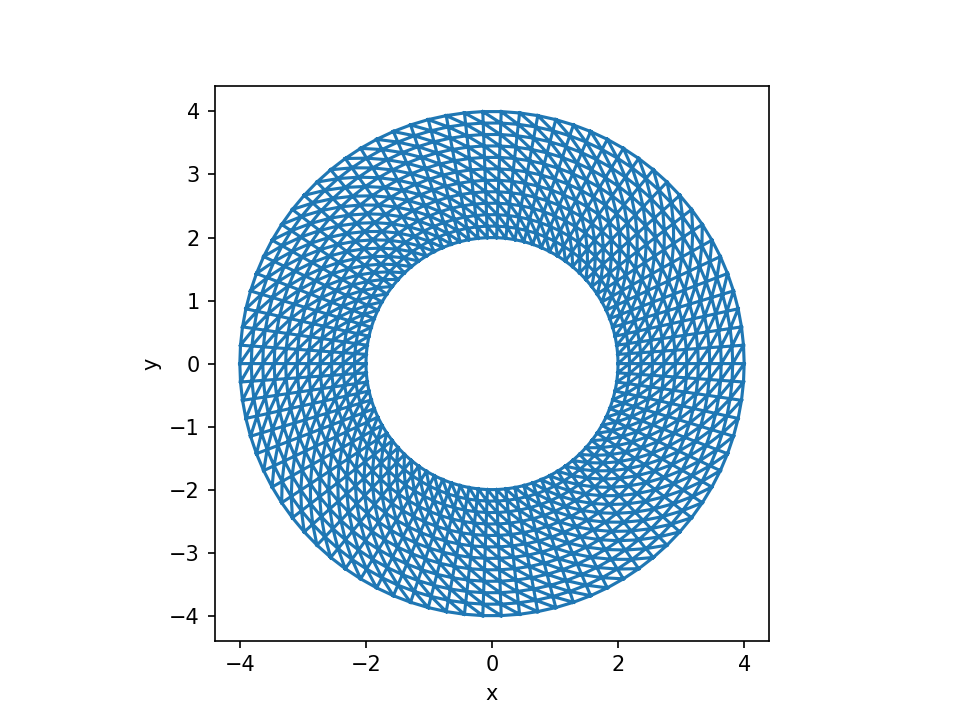

(-4.4, 4.4, -4.397064533566326, 4.397064533566326)

In [5]:
plt.figure()
plt.triplot(puntos[:, 0], puntos[:, 1], triangs)
plt.xlabel("x")
plt.ylabel("y")
plt.axis("image")

También podemos visualizar contornos sobre la malla con la función
`tricontourf()`. Sus parámetros de entrada son:
    
- Coordenadas $x$.

- Coordenadas $y$.

- Conectividad de los elementos.

- Variable a visualizar.

<IPython.core.display.Javascript object>


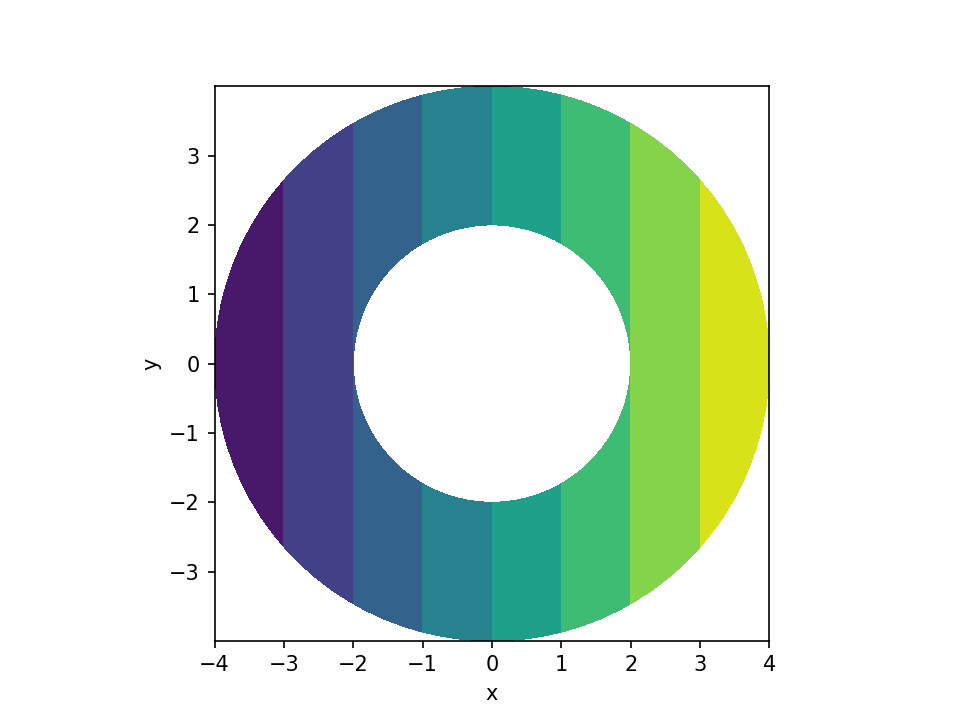

(-4.0, 4.0, -3.997331394151205, 3.997331394151205)

In [6]:
plt.figure()
plt.tricontourf(puntos[:, 0], puntos[:, 1], triangs, puntos[:, 0])
plt.xlabel("x")
plt.ylabel("y")
plt.axis("image")

<div class="alert alert-warning">

Modifique la celda anterior para visualizar el radio, medido respecto a 
$(0, 0)$, de los puntos del anillo.

</div>

## Actividad para la clase

Cree un archivo de Gmsh que represente la geometría de la presa trapezoidal y el suelo. Genere su malla y léala en Python.

## Formato del notebook

La siguiente celda cambia el formato del Notebook.

In [7]:
from IPython.core.display import HTML
def css_styling():
    styles = open('./nb_style.css', 'r').read()
    return HTML(styles)
css_styling()